<a href="https://colab.research.google.com/github/mchen899923/eda_assignment/blob/main/Copy_of_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1.1

Work shown through picture on Github.

1.2

Work shown through picture on Github.

1.3

Work shown through picture on Github.

1.4

If we pose a scenario where we plot y = 3x on a graph and we mark x values at 0, 1, and 2, the corresponding y values would be 0, 3, and 6. In the x values, the median is 1. After transforming the x values, the median of the y values is 3. Thus, the non-decreasing transformation of the median is the median of the transformed variables. Specifically, the median undergoes the same transformation as the rest of the variables. The quantile is also similar in that a non-decreasing transformation to the 25th or 75th quantile, for example, will still be the quantile of the transformed variables because they all undergo the same change. This also applies to the IQR and the range.

1.5

It is not always true that m(g(x)) = g(m(x)). For example, this equation applies to linear scenarios. What I mean by a linear scenario is if g(x) represents multiplying 2 to x. However, this equation does not apply to exponential or logarithmic scenarios. What I mean by an exponential scenario is getting the square of x.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.1

In [2]:
airbnb_df = pd.read_csv("airbnb_hw.csv") #loaded the data with Pandas
airbnb_df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


2.2

In [3]:
print(airbnb_df.shape) #dimensions of the data #(30478, 13)

number_of_observations = airbnb_df.shape[0]
print(number_of_observations) #number of observations #30478

print(airbnb_df.columns) #included variables #Host Id, Host Since, Name, Neighborhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, NUmber of Records, Number of Reviews, Price, Review Scores Rating

airbnb_df.head() #first few rows of data

(30478, 13)
30478
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


2.3

I've noticed that apartments are the most common property type. Specifically, entire apartments are more available than any other kind of property. Some of the least common properties (below 10) include entire areas for boats, bungalows, cabins, campers/RVs, castles, chalets, dorms, huts, lighthouses, tents, treehouses, and villas, private rooms for boats, bungalows, cabins, campers/RVs, castles, chalets, huts, lighthouses, tents, treehouses, and villas, and shared rooms for boats, bungalows, cabins, campers/RVs, castles, chalets, condominiums, huts, lighthouses, other property types, tents, townhouses, treehouses, and villas. Many of the mentioned properties are also not available.

For properties where private rooms are more commonly rented, these include, bed and breakfasts, dorms, houses, other property types, and tents.

In [4]:
pd.crosstab(airbnb_df["Room Type"], airbnb_df["Property Type"]) #cross tab of Room Type and Property Type

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


2.4

The pre-transformation data from the histogram, the kernel density plot, the boxplot, and the statistical description seem to be badly skewed. Especially in the histogram, it's hard to tell how many data points are in each bin, especially as we move along the x-axis. Similarly, with the density plot, it is hard to tell how many data points are there as we go along the x-axis. The boxplot also shows a significant number of outliers.

<Axes: >

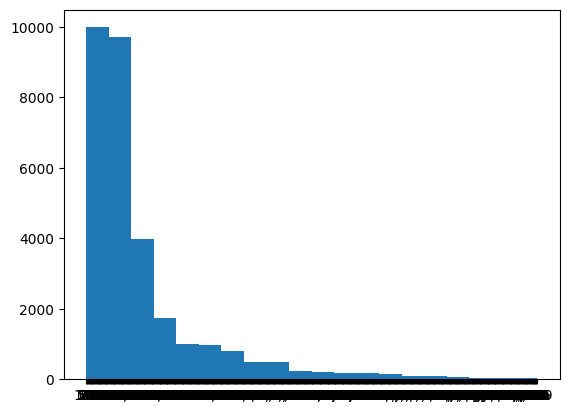

In [8]:
airbnb_df["Price"].hist(bins=20, grid=False) #histogram (pre-transformation)

<Axes: ylabel='Density'>

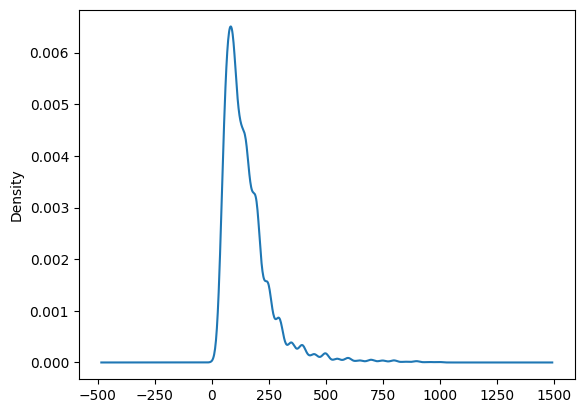

In [10]:
var = "Price"
airbnb_df[var] = pd.to_numeric(airbnb_df[var], errors='coerce') # Convert to numeric, coercing errors
airbnb_df[var].plot.density() #kernel density plot

<Axes: >

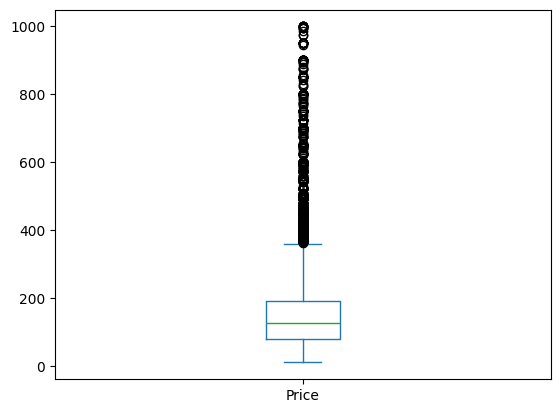

In [11]:
airbnb_df["Price"].plot.box() #box plot

In [12]:
descr = airbnb_df["Price"].describe() #Describe price and save as an object
print(descr, '\n')

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 



In [13]:
std = descr["std"] #computing variance
var = std**2
print("Variance: ", var, '\n')

Variance:  11858.27313785064 



In [14]:
#Computing IQR
thirdQ = descr["75%"] #75% percentile
firstQ = descr["25%"] #25% percentile
IQR = thirdQ - firstQ #IQR
print("IQR: ", IQR)

IQR:  112.0


<Axes: >

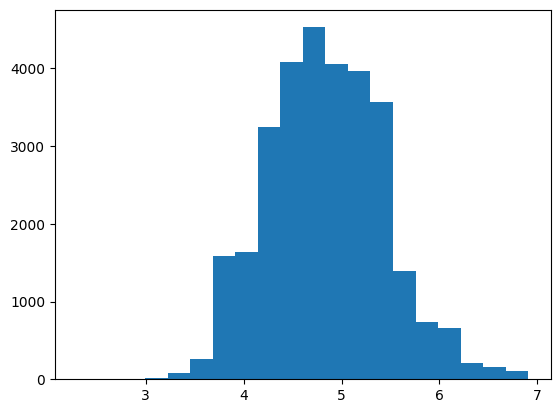

In [15]:
airbnb_df["price_log"] = np.log(airbnb_df["Price"]) #log transformation of price

airbnb_df.loc[airbnb_df["price_log"]>0, "price_log"].hist(bins=20, grid=False) #histogram (post-transformation)

<Axes: ylabel='Density'>

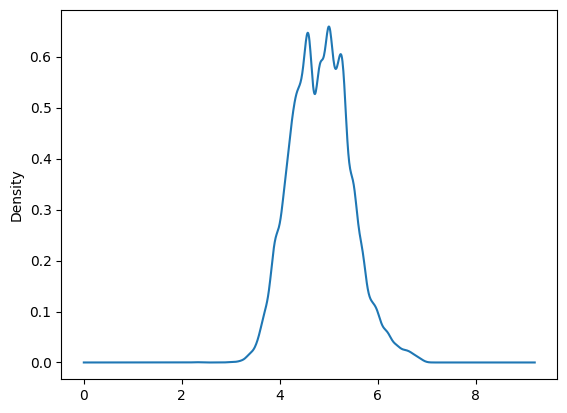

In [16]:
var = "price_log"
airbnb_df[var].plot.density() #kernel_density plot post-transformation

<Axes: >

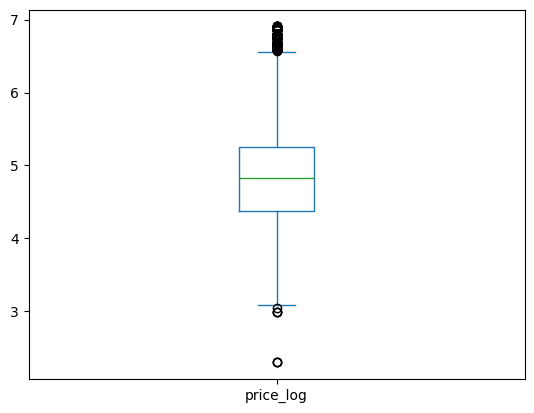

In [17]:
airbnb_df["price_log"].plot.box() #box plot post-transformation

In [18]:
descr = airbnb_df["price_log"].describe() #Describe price_log and save as an object
print(descr, '\n')

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64 



In [19]:
std = descr["std"] #computing variance of price_log
var = std**2
print("Variance: ", var, '\n')

Variance:  0.3564079204065675 



In [20]:
#Computing IQR of price_log
thirdQ = descr["75%"] #75% percentile of price_log
firstQ = descr["25%"] #25% percentile of price_log
IQR = thirdQ - firstQ #IQR of price_log
print("IQR: ", IQR)

IQR:  0.8754687373539003


2.5

<Axes: xlabel='price_log', ylabel='Beds'>

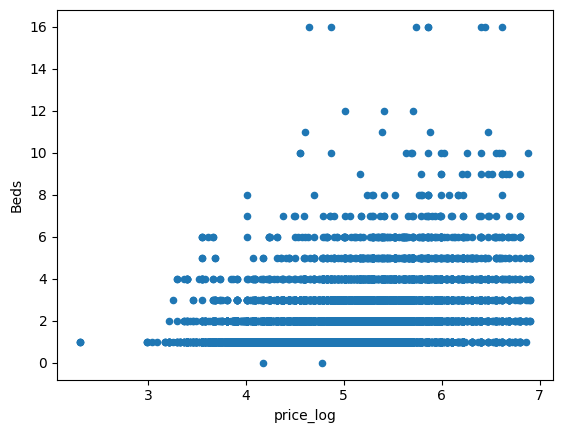

In [21]:
airbnb_df.plot.scatter(x="price_log", y="Beds") #scatterplot of price_log and Beds

#I see more dots clustering towards the higher end of the price_log axis and the lower end of the Beds axis. I see a few data points towards the top, but I mainly see rows of clustered data points towards the bottom right of the scatterplot.

In [22]:
descriptions_by_beds = airbnb_df.groupby("Beds")["price_log"].describe() #description of price_log conditional on Beds
descriptions_by_beds

# I noticed that as the number of beds increases, the average price also
# increases too. However, I noticed that after 9 beds, the average price
# actually decreases, getting to a low of about 5.38 before going back to 5.80.
# In terms of the standard deviation, it continues to increase proportionally as
# the number of bed increases. However, the std fluctuates around 7 to 10 beds,
# decreasing to a low of 0.44 before increasing to 0.74. It continues along this
# pattern, decreasing to 0.35 at 12 beds before increasing to 0.72 at 16 beds.

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20307.0,4.682084,0.527569,2.302585,4.317488,4.605170,5.043425,6.856462
2.0,6561.0,5.077679,0.546961,3.218876,4.744932,5.075174,5.416100,6.906755
3.0,2029.0,5.297638,0.572851,3.258097,4.941642,5.298317,5.700444,6.906755
4.0,766.0,5.438240,0.666451,3.295837,5.010635,5.480639,5.896449,6.906755
5.0,274.0,5.596976,0.624868,3.555348,5.225704,5.652489,6.052089,6.902743
6.0,166.0,5.538625,0.712393,3.555348,5.212968,5.602112,5.988961,6.802395
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,20.0,5.674340,0.579810,4.007333,5.386655,5.826995,6.012435,6.620073


2.6

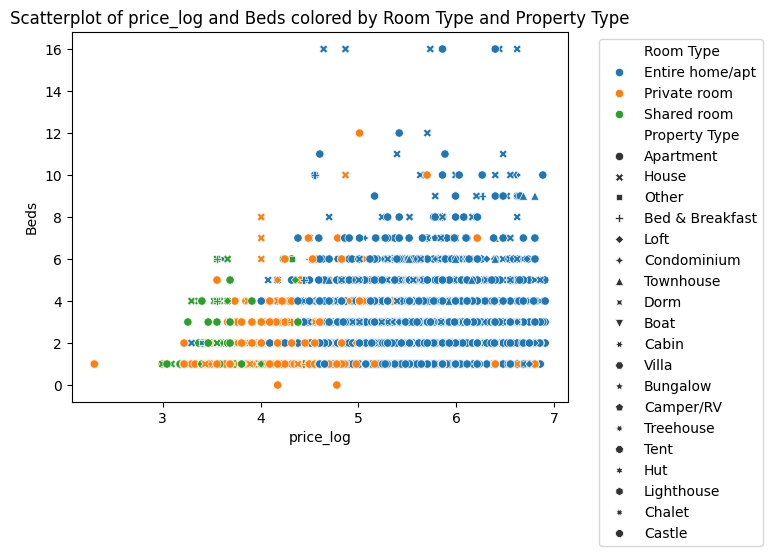

In [23]:
import seaborn as sns

sns.scatterplot(data=airbnb_df, x="price_log", y="Beds", hue="Room Type", style="Property Type") #scatterplot of price_log and Beds, colored by Room Type and Property Type
plt.title("Scatterplot of price_log and Beds colored by Room Type and Property Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#I noticed that there tend to be more prices per bed for entire homes/apartments. There are less data points for private rooms, and even less data points for shared rooms. There tend to be more apartments sold, with quite a few house data points as well. It is harder to see data points for other property types.

In [24]:
conditional_description = airbnb_df.groupby(["Room Type", "Property Type"])["price_log"].describe() #description of price_log conditional on Room Type and Property Type
conditional_description

#I think entire homes/apartments tend to have highest average prices. I think entire homes/apartments tend to have the highest standard deviation. I feel as though median would be a better measure of central tendency because the data is more skewed, with a few outliers.

count      mean       std       min  \
Room Type       Property Type                                            
Entire home/apt Apartment        15550.0  5.189336  0.449590  2.302585   
                Bed & Breakfast     13.0  5.077144  0.516313  4.442651   
                Boat                 7.0  5.022801  0.312121  4.605170   
                Bungalow             4.0  4.972587  0.355222  4.465908   
                Cabin                1.0  5.521461       NaN  5.521461   
                Camper/RV            6.0  4.458062  0.767476  3.806662   
                Condominium         71.0  5.479808  0.548559  4.382027   
                Dorm                 4.0  3.698835  0.466067  3.401197   
                House              723.0  5.265601  0.610416  3.295837   
                Lighthouse           1.0  3.663562       NaN  3.663562   
                Loft               379.0  5.479039  0.573715  4.007333   
                Other               10.0  5.322767  0.857444  4.189655   
                Townhouse           81.0  5.309290  0.577858  4.189655   
                Villa                3.0  5.262084  0.457553  4.787492   
Private room    Apartment        10741.0  4.430388  0.399798  2.302585   
                Bed & Breakfast    155.0  4.476887  0.437511  3.465736   
                Boat                 1.0  4.787492       NaN  4.787492   
                Cabin                1.0  4.382027       NaN  4.382027   
                Camper/RV            1.0  3.663562       NaN  3.663562   
                Castle               1.0  5.010635       NaN  5.010635   
                Chalet               1.0  4.595120       NaN  4.595120   
                Condominium         22.0  4.511922  0.406843  3.828641   
                Dorm                16.0  4.381505  0.386500  3.912023   
                House             1258.0  4.256318  0.403029  3.218876   
                Hut                  2.0  4.258597  0.490129  3.912023   
                Loft               310.0  4.488784  0.424338  3.663562   
                Other               28.0  4.908285  0.719147  3.663562   
                Tent                 4.0  4.598841  0.822393  3.688879   
                Townhouse           52.0  4.360348  0.355681  3.806662   
                Treehouse            1.0  4.553877       NaN  4.553877   
                Villa                4.0  4.702199  0.616979  4.094345   
Shared room     Apartment          684.0  4.209103  0.501228  2.995732   
                Bed & Breakfast     12.0  4.346141  0.958659  3.401197   
                Dorm                11.0  4.164405  0.496675  3.401197   
                House               79.0  3.765539  0.379286  2.302585   
                Loft                49.0  4.115564  0.591498  3.401197   
                Other                4.0  4.757272  0.749856  4.248495   
                Townhouse            1.0  4.553877       NaN  4.553877   
                Treehouse            3.0  4.979930  0.630146  4.553877   

                                      25%       50%       75%       max  
Room Type       Property Type                                            
Entire home/apt Apartment        4.905275  5.164786  5.438079  6.906755  
                Bed & Breakfast  4.795791  4.867534  5.393628  6.263398  
                Boat             4.807903  5.010635  5.203266  5.521461  
                Bungalow         4.869437  5.075720  5.178871  5.273000  
                Cabin            5.521461  5.521461  5.521461  5.521461  
                Camper/RV        3.891820  4.243470  4.733123  5.783825  
                Condominium      5.043425  5.298317  5.885235  6.745236  
                Dorm             3.401197  3.506058  3.803695  4.382027  
                House            4.828314  5.236442  5.700444  6.856462  
                Lighthouse       3.663562  3.663562  3.663562  3.663562  
                Loft             5.075174  5.393628  5.857933  6.892642  
                Other            4.816

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3.1

Some numeric variables are not correctly read in by Pandas, so they will have to be typecasted/coerced. In order for the data to be cleaned, we should convert or coerce the variables labeled "objects" to numeric. This is especially the case if the variable itself is called "number of rigs" but is mistaken for an object. To do this, we can use the pd.to_numeric command to convert these variables to numeric, and within that code, we can use errors = coerce to convert a value that cannot be made numeric into a missing value (NaN). This can be used to convert the correct variables to numeric in Pandas. Another way to clean the data is to check for NA values and drop them with the drilling_df.dropna code to get unique values.

In [26]:
drilling_df = pd.read_csv("drilling_rigs.csv")
drilling_df

number_of_observations = drilling_df.shape[0]
print(number_of_observations) #number of observations #623

print(drilling_df.columns) #10 variables

print(drilling_df.dtypes) #returns a series of dtypes of each column

623
Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    

3.2

In [28]:
drilling_df['time'] = pd.to_datetime(drilling_df['Month'], format='mixed')
print(drilling_df['time'])

0     1973-01-01
1     1973-02-01
2     1973-03-01
3     1973-04-01
4     1973-05-01
         ...    
618   2024-07-01
619   2024-08-01
620   2024-09-01
621   2024-10-01
622   2024-11-01
Name: time, Length: 623, dtype: datetime64[ns]


3.3

I see an overall decrease in the number of rigs over time. There is some increase at the start, but it continues to decrease over time.

Text(0.5, 1.0, 'Active Well Service Rig Count (Number of Rigs) Over Time')

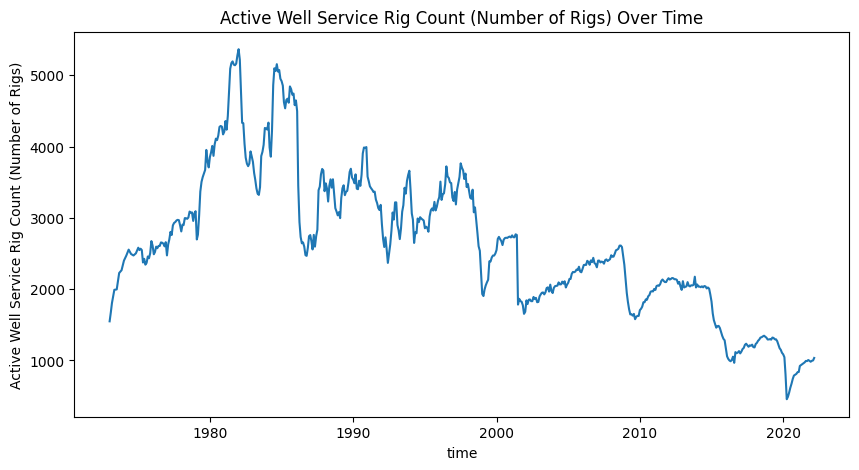

In [30]:
drilling_df["Active Well Service Rig Count (Number of Rigs)"] = pd.to_numeric(drilling_df["Active Well Service Rig Count (Number of Rigs)"], errors='coerce')
drilling_df.dropna(subset=["Active Well Service Rig Count (Number of Rigs)"], inplace=True)
drilling_df["RigCount_log"] = np.log(drilling_df["Active Well Service Rig Count (Number of Rigs)"])

plt.figure(figsize=(10,5))
sns.lineplot(
    data=drilling_df,
    x="time",
    y="Active Well Service Rig Count (Number of Rigs)"
)

plt.title("Active Well Service Rig Count (Number of Rigs) Over Time")

3.4

In [32]:
rig = drilling_df.sort_values("time")
y = rig["Active Well Service Rig Count (Number of Rigs)"].to_numpy()
t = len(y)
diff = y[1:] - y[:(t-1)]
date = rig["time"].to_numpy()[1:]

Text(0, 0.5, 'Rig Count Change')

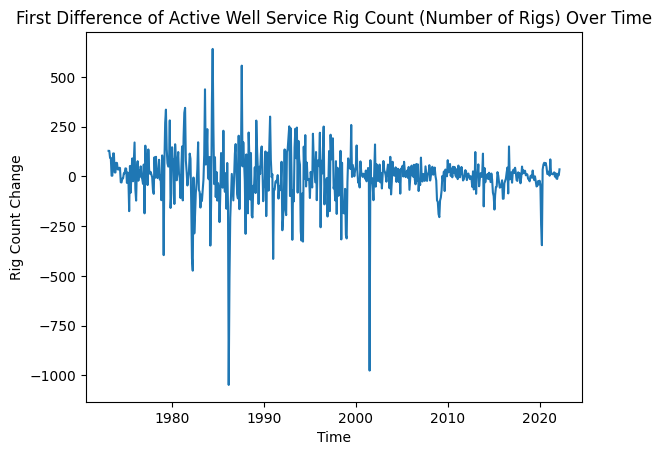

In [34]:
sns.lineplot(x=date, y=diff)
plt.title("First Difference of Active Well Service Rig Count (Number of Rigs) Over Time")
plt.xlabel("Time")
plt.ylabel("Rig Count Change")

#There seems to be general spikes in the graph above and below 0. This shows an increase and decrease in rig count.

3.5

In [36]:
melted_drilling = drilling_df.melt(id_vars=["time"], value_vars=["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)", "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"])
print(melted_drilling)

           time                                           variable  value
0    1973-01-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   1120
1    1973-02-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   1037
2    1973-03-01  Crude Oil and Natural Gas Rotary Rigs in Opera...    959
3    1973-04-01  Crude Oil and Natural Gas Rotary Rigs in Opera...    914
4    1973-05-01  Crude Oil and Natural Gas Rotary Rigs in Opera...    974
...         ...                                                ...    ...
1177 2021-11-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     15
1178 2021-12-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     14
1179 2022-01-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     18
1180 2022-02-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     14
1181 2022-03-01  Crude Oil and Natural Gas Rotary Rigs in Opera...     12

[1182 rows x 3 columns]


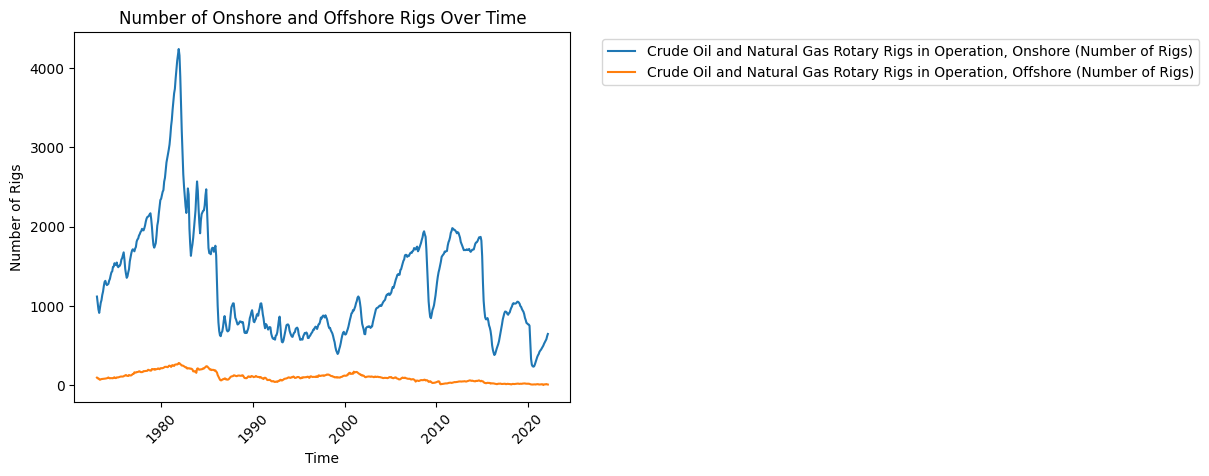

In [38]:
sns.lineplot(data=melted_drilling, x="time", y="value", hue="variable")
plt.title("Number of Onshore and Offshore Rigs Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()